**Auswertung:**

- The problem still remains: Energy Consumption is too high compared to baseline (because there are many setpoint changes during unoccupancy, that should not be there)
- The changed reward function (sum_emean_ediff_mstpc) did not make this situation better
- 302-ln / 304: Changing the L2 to a L1 loss for DQN learning did not help for MSTPC, but reduced energy consumption in this run, but not in NB2123, which had the same settings

- **Idea**: Try a broadcast-agent, this should help, because then the reward exactly states what it is doing -> will get scenario 306
- 302-ln is still good, use higher lambda for ECons -> will get scenario 305

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import os
import sys
import ast
import pickle

glp = os.path.abspath("../code")
if not glp in sys.path: sys.path.append( glp )

from global_paths import global_paths

if not global_paths["COBS"] in sys.path: sys.path.append( global_paths["COBS"] )

In [3]:
import cobs
import torch
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import subprocess

In [4]:
import StateUtilities as SU

In [5]:
import visualization_helper_v2 as vh

In [6]:
fig_width = 30

In [7]:
dirnames = ["../checkpoints/b001/",
            "../checkpoints/s302-ln/20210612-1948/",
            "../checkpoints/s303/20210614-0923/",
            "../checkpoints/s303-npar/20210602-1713/",
            "../checkpoints/s304/20210602-1112/"]

In [8]:
alldfs = [ vh.convert_sqlite_to_df(dirname) for dirname in dirnames ]

Table eels convertet to a pandas dataframe.
Table sees convertet to a pandas dataframe.
Table seesea convertet to a pandas dataframe.
Table sees_er convertet to a pandas dataframe.
Table eels convertet to a pandas dataframe.
Table sees convertet to a pandas dataframe.
Table seesea convertet to a pandas dataframe.
Table sees_er convertet to a pandas dataframe.
Table eels convertet to a pandas dataframe.
Table sees convertet to a pandas dataframe.
Table seesea convertet to a pandas dataframe.
Table sees_er convertet to a pandas dataframe.
Table eels convertet to a pandas dataframe.
Table sees convertet to a pandas dataframe.
Table seesea convertet to a pandas dataframe.
Table sees_er convertet to a pandas dataframe.
Table eels convertet to a pandas dataframe.
Table sees convertet to a pandas dataframe.
Table seesea convertet to a pandas dataframe.
Table sees_er convertet to a pandas dataframe.


In [9]:
q_values = vh.load_and_convert_q_values(dirnames)

No Q-value list found for ../checkpoints/b001/.


In [10]:
vh.get_arguments_overview(dirnames)

b001  \
algorithm                            baseline_rule-based   
ddqn_new                                               0   
lr                                                  0.01   
batch_size                                           128   
lambda_rwd_mstpc                                     0.1   
lambda_rwd_energy                                  5e-06   
reward_function                         sum_energy_mstpc   
energy_cons_in_kWh                                     0   
reward_offset                                        0.0   
clip_econs_at                                        0.0   
soften_instead_of_clipping                             0   
ddqn_loss                                             L2   
target_network_update_freq                             3   
epsilon_final_step                                   100   
epsilon_decay_mode                           exponential   
episodes_count                                       100   
agent_init_gain                                      0.8   
use_layer_normalization                                0   
fewer_q_values                                         0   
agent_w_l2                                         1e-05   
network_storage_frequency                             10   
model                            Building_5ZoneAirCooled   
single_setpoint_agent_count                          all   
next_occ_horizont                                      0   
rulebased_setpoint_unoccu_delta                      7.0   

                                                                s302-ln  \
algorithm                                                          ddqn   
ddqn_new                                                              1   
lr                                                                  0.1   
batch_size                                                          256   
lambda_rwd_mstpc                                                   0.16   
lambda_rwd_energy                                                 0.017   
reward_function                                        sum_energy_mstpc   
energy_cons_in_kWh                                                    1   
reward_offset                                                       0.3   
clip_econs_at                                                     150.0   
soften_instead_of_clipping                                            0   
ddqn_loss                                                            L2   
target_network_update_freq                                            2   
epsilon_final_step                                                16000   
epsilon_decay_mode                                               linear   
episodes_count                                                      160   
agent_init_gain                                                     0.7   
use_layer_normalization                                               1   
fewer_q_values                                                        1   
agent_w_l2                                                        1e-06   
network_storage_frequency                                           160   
model                            Building_5ZoneAirCooled_SingleSetpoint   
single_setpoint_agent_count                                one_but2not5   
next_occ_horizont                                                     2   
rulebased_setpoint_unoccu_delta                                     7.0   

                                                                   s303  \
algorithm                                                          ddqn   
ddqn_new                                                              0   
lr                                                                  0.1   
batch_size                                                          256   
lambda_rwd_mstpc                                                   0.12   
lambda_rwd_energy                                                  0.18   
reward_function

In [11]:
vh.get_runtime_overview_df(alldfs, dirnames)

b001       s302-ln  \
Number of training episodes                      1.0  16000.000000   
Runtime in s                                     0.0  76831.106828   
Runtime in h                                     0.0     21.341974   
Mean episode runtime in s                        0.0      4.801944   
Mean episode runtime during eval. episode in s   0.0      4.839028   
Mean episode runtime after eval. episode in s    NaN      4.750446   
Mean episode runtime in no eval. episode in s    NaN      4.801711   

                                                        s303     s303-npar  \
Number of training episodes                     16000.000000  16160.000000   
Runtime in s                                    83930.664404  74253.479014   
Runtime in h                                       23.314073     20.625966   
Mean episode runtime in s                           5.245667      4.594894   
Mean episode runtime during eval. episode in s      5.421507      4.747980   
Mean episode runtime after eval. episode in s       5.192850      4.531468   
Mean episode runtime in no eval. episode in s       5.244561      4.593931   

                                                        s304  
Number of training episodes                     16160.000000  
Runtime in s                                    74247.210507  
Runtime in h                                       20.624225  
Mean episode runtime in s                           4.594506  
Mean episode runtime during eval. episode in s      4.754142  
Mean episode runtime after eval. episode in s       4.546985  
Mean episode runtime in no eval. episode in s       4.593502

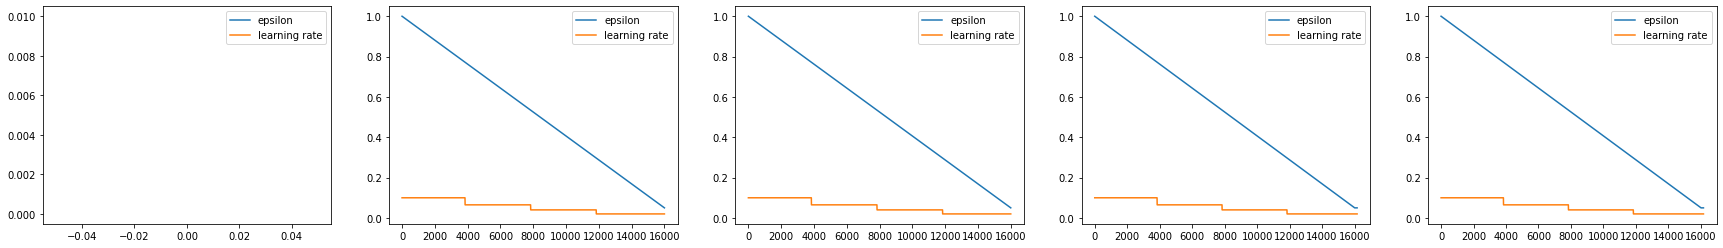

In [12]:
p, _ = vh.complete_plot_epsilon(alldfs, fig_width)
p.show()

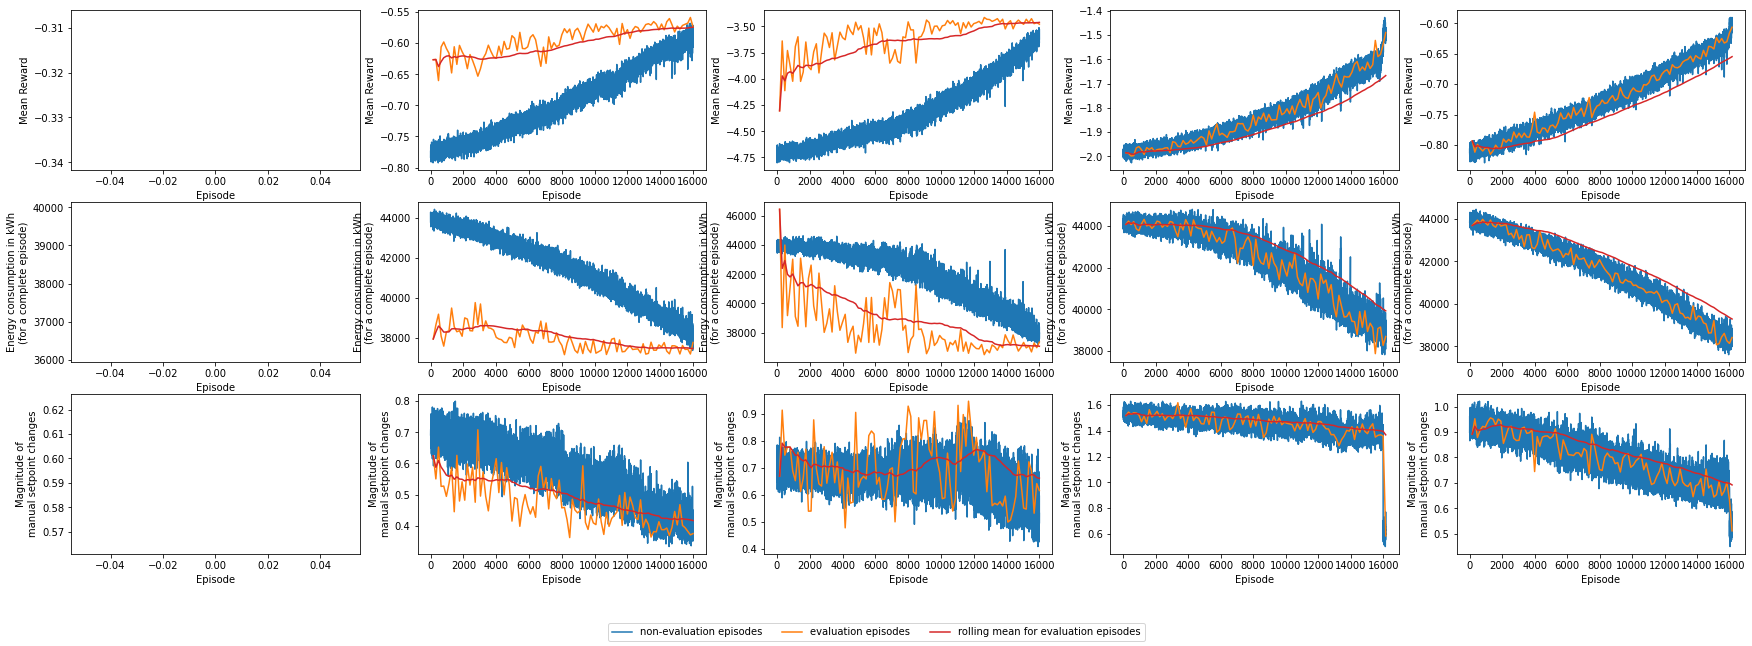

In [13]:
p, _ = vh.complete_plot_reward_stpc_econs(alldfs, fig_width)
p.show()

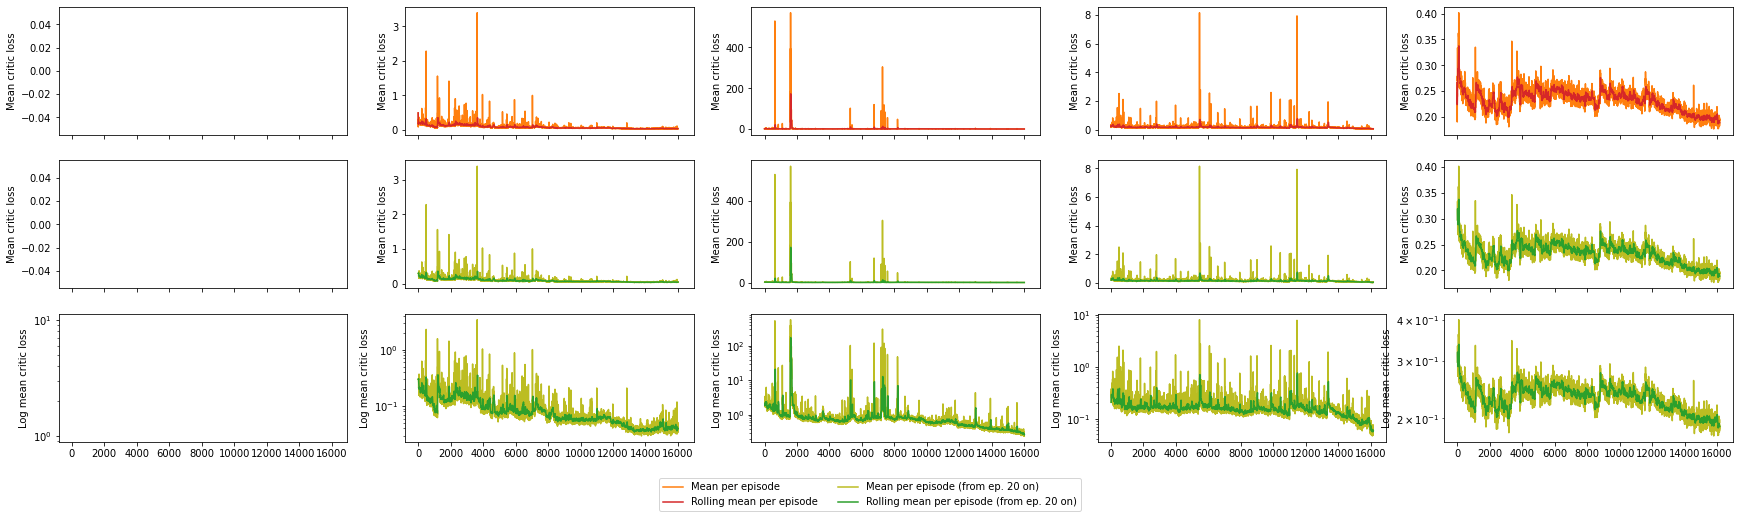

In [14]:
p, _ = vh.complete_plot_losses(alldfs, fig_width, with_agents=False)
p.show()

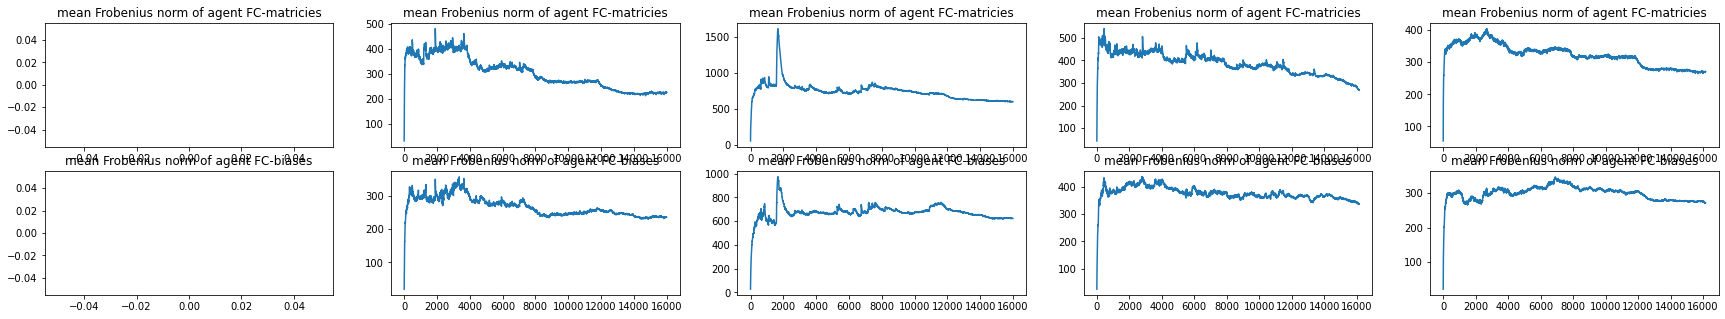

In [15]:
p, _ = vh.complete_plot_frobenius_norms(alldfs, fig_width, with_critics=False)
p.show()

In [16]:
last_available_eval_episodes = vh.compute_last_available_eval_episode(alldfs)

Last available evaluation episode for dfs0:      0
Last available evaluation episode for dfs1:  15999
Last available evaluation episode for dfs2:  15999
Last available evaluation episode for dfs3:  16159
Last available evaluation episode for dfs4:  16159


<h3>Details for one week</h3>

In [17]:
#selected_episodes = [13120 - 1, 14480 - 1, 14480 - 1]
#selected_weeks    = [datetime.datetime(2017, 1, 1), datetime.datetime(2017, 1, 1), datetime.datetime(2017, 1, 1)]

In [18]:
if not "selected_episodes" in locals().keys():
    selected_episodes = last_available_eval_episodes.copy()
if not "selected_weeks" in locals().keys():
    # the start of the evaluation episode
    selected_weeks = [datetime.datetime.strptime(dfs['sees'].iloc[0]["datetime"], "%Y-%m-%d %H:%M:%S")
                      for dfs in alldfs]

subdfs = vh.select_week_and_episode_for_dfs_list(alldfs, selected_episodes, selected_weeks)

In [19]:
vh.print_reward_informations(subdfs, selected_episodes)

First complete week of evaluation episode
For episode     0: Energy consumption:   38042.14 kWh; Sum of setpoint change magnitudes: 426.88118883889297
For episode 15999: Energy consumption:   37760.38 kWh; Sum of setpoint change magnitudes: 269.9946775477011
For episode 15999: Energy consumption:   37364.56 kWh; Sum of setpoint change magnitudes: 442.47462336827573
For episode 16159: Energy consumption:   38688.57 kWh; Sum of setpoint change magnitudes: 418.96569742204935
For episode 16159: Energy consumption:   38419.23 kWh; Sum of setpoint change magnitudes: 367.17562359756823

Mean values for episode ...
...     0: Reward: -0.32392 kWh; Setpoint change magnit.:  0.59372; Energy cons.: 52909.78911
... 15999: Reward: -0.57412 kWh; Setpoint change magnit.:  0.37551; Energy cons.: 52517.91463
... 15999: Reward: -3.47834 kWh; Setpoint change magnit.:  0.61540; Energy cons.: 51967.39273
... 16159: Reward: -1.48962 kWh; Setpoint change magnit.:  0.58271; Energy cons.: 53808.86500
... 16159

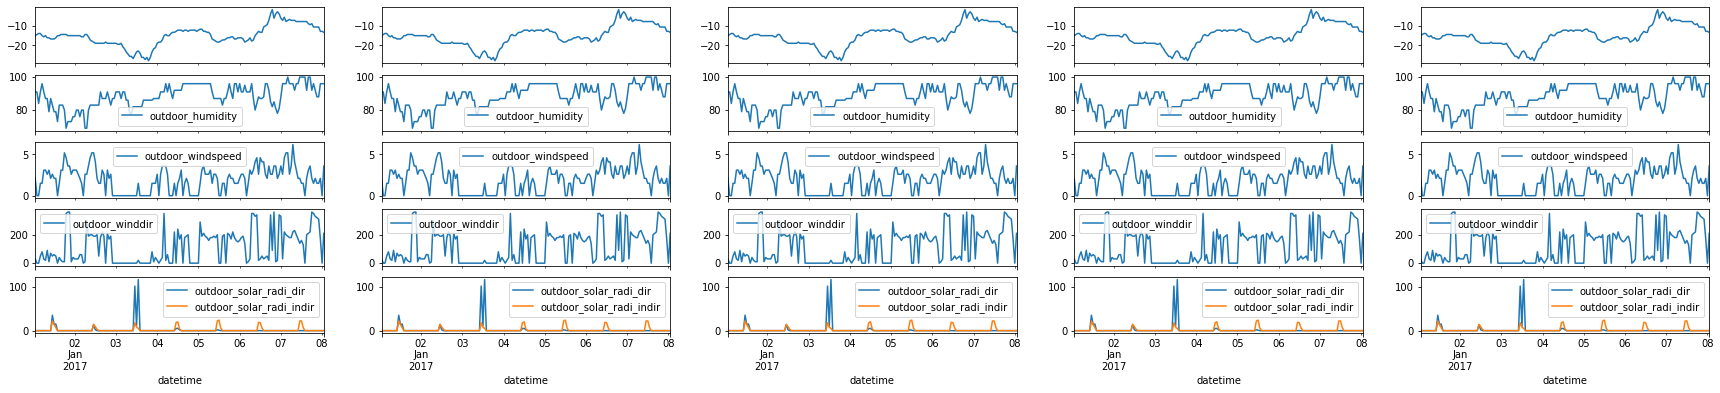

In [20]:
p, _ = vh.complete_plot_weather_information(subdfs, fig_width)
p.show()

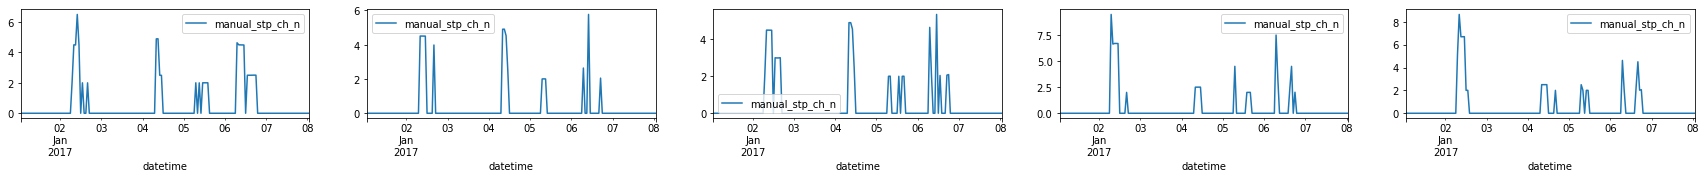

In [21]:
p, _ = vh.complete_plot_number_of_stp_ch(subdfs, fig_width)
p.show()

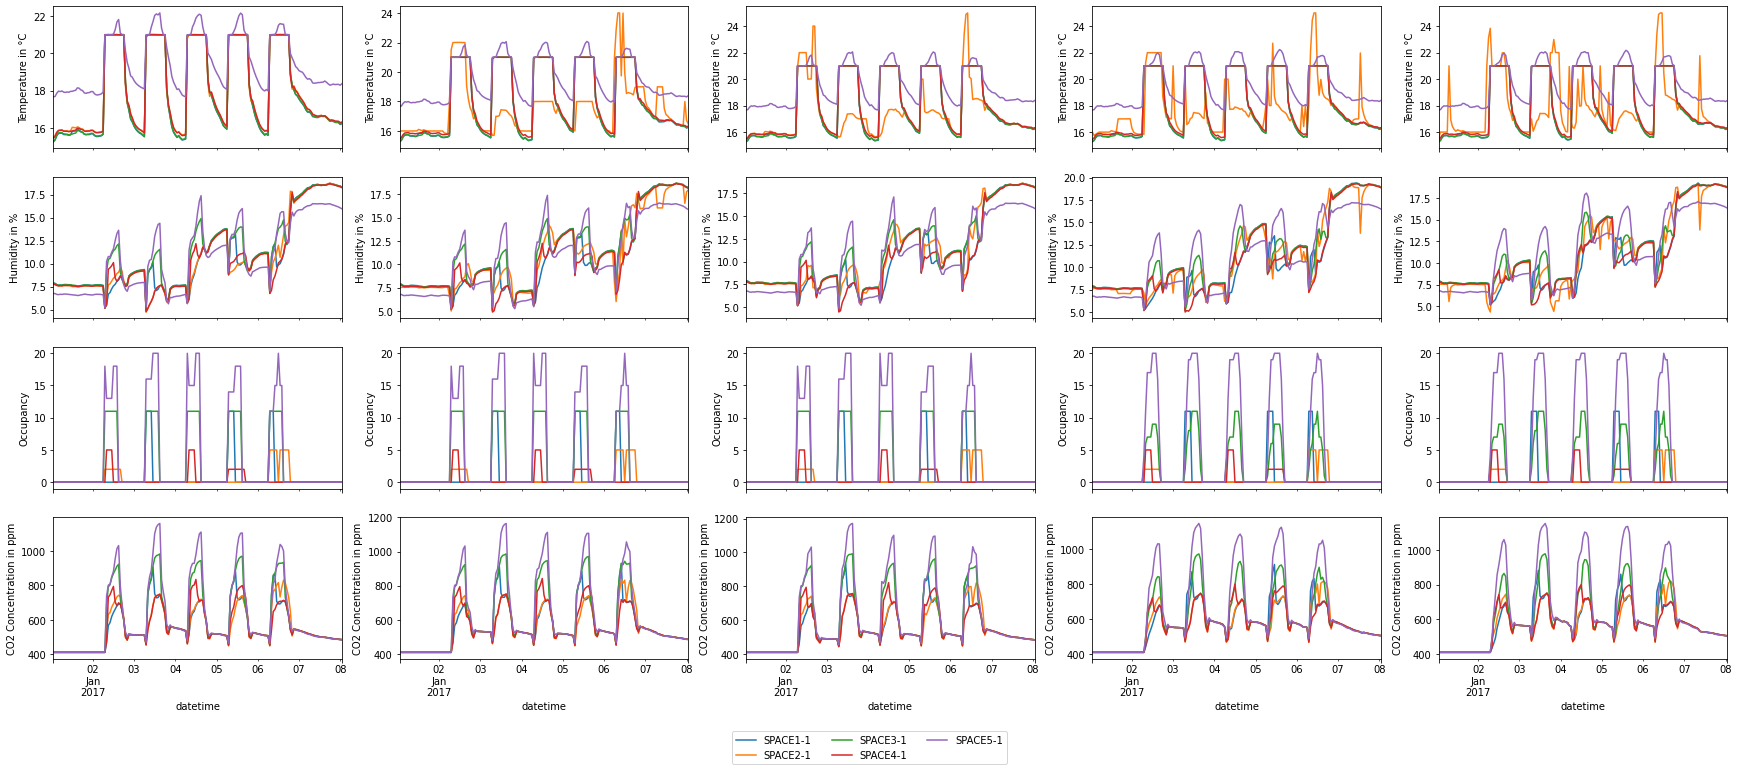

In [22]:
p, _ = vh.complete_plot_room_status(subdfs, fig_width)
p.show()

In [23]:
subdfs_rooms, subdfs_agents = vh.get_available_rooms_and_agents(subdfs)

Available Rooms     in (sub-)dfs0: ['SPACE1-1' 'SPACE2-1' 'SPACE3-1' 'SPACE4-1' 'SPACE5-1']
Available Agent IDs in (sub-)dfs0: {'SPACE1-1': 0, 'SPACE2-1': 1, 'SPACE3-1': 2, 'SPACE4-1': 3, 'SPACE5-1': 4} 

Available Rooms     in (sub-)dfs1: ['SPACE1-1' 'SPACE2-1' 'SPACE3-1' 'SPACE4-1' 'SPACE5-1']
Available Agent IDs in (sub-)dfs1: {'SPACE2-1': 0, 'SPACE5-1': 1, 'SPACE4-1': 2, 'SPACE3-1': 3, 'SPACE1-1': 4} 

Available Rooms     in (sub-)dfs2: ['SPACE1-1' 'SPACE2-1' 'SPACE3-1' 'SPACE4-1' 'SPACE5-1']
Available Agent IDs in (sub-)dfs2: {'SPACE2-1': 0, 'SPACE5-1': 1, 'SPACE4-1': 2, 'SPACE3-1': 3, 'SPACE1-1': 4} 

Available Rooms     in (sub-)dfs3: ['SPACE1-1' 'SPACE2-1' 'SPACE3-1' 'SPACE4-1' 'SPACE5-1']
Available Agent IDs in (sub-)dfs3: {'SPACE2-1': 0, 'SPACE5-1': 1, 'SPACE4-1': 2, 'SPACE3-1': 3, 'SPACE1-1': 4} 

Available Rooms     in (sub-)dfs4: ['SPACE1-1' 'SPACE2-1' 'SPACE3-1' 'SPACE4-1' 'SPACE5-1']
Available Agent IDs in (sub-)dfs4: {'SPACE2-1': 0, 'SPACE5-1': 1, 'SPACE4-1': 2, 'SPACE3

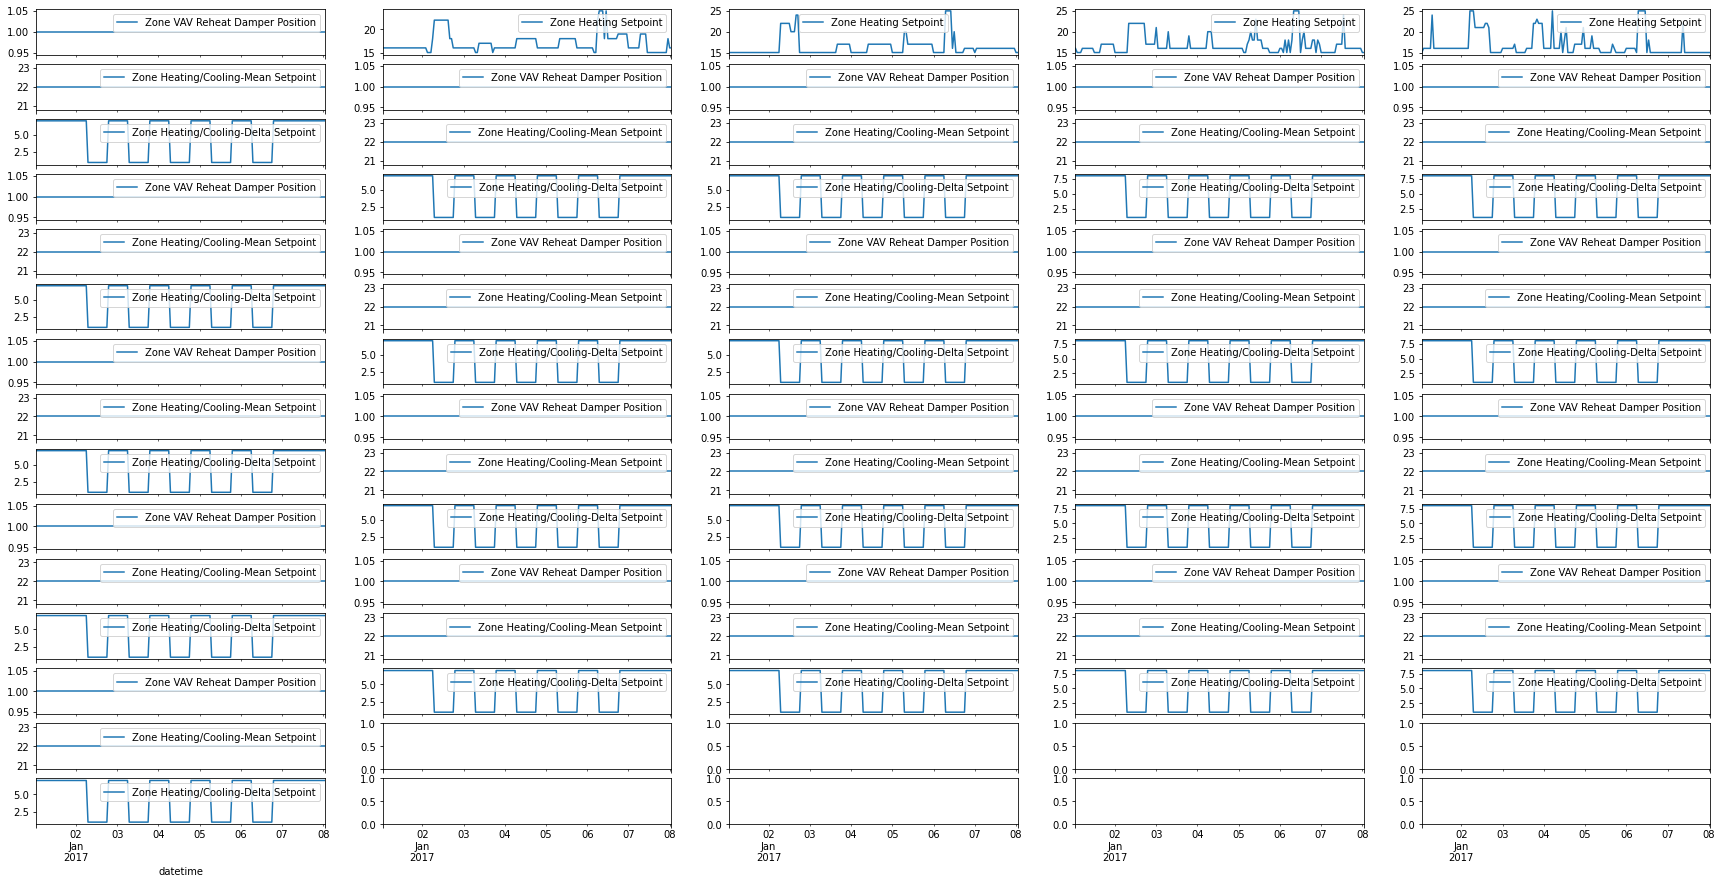

In [24]:
p, _ = vh.complete_plot_all_agent_outputs(subdfs, fig_width, subdfs_agents)
p.show()

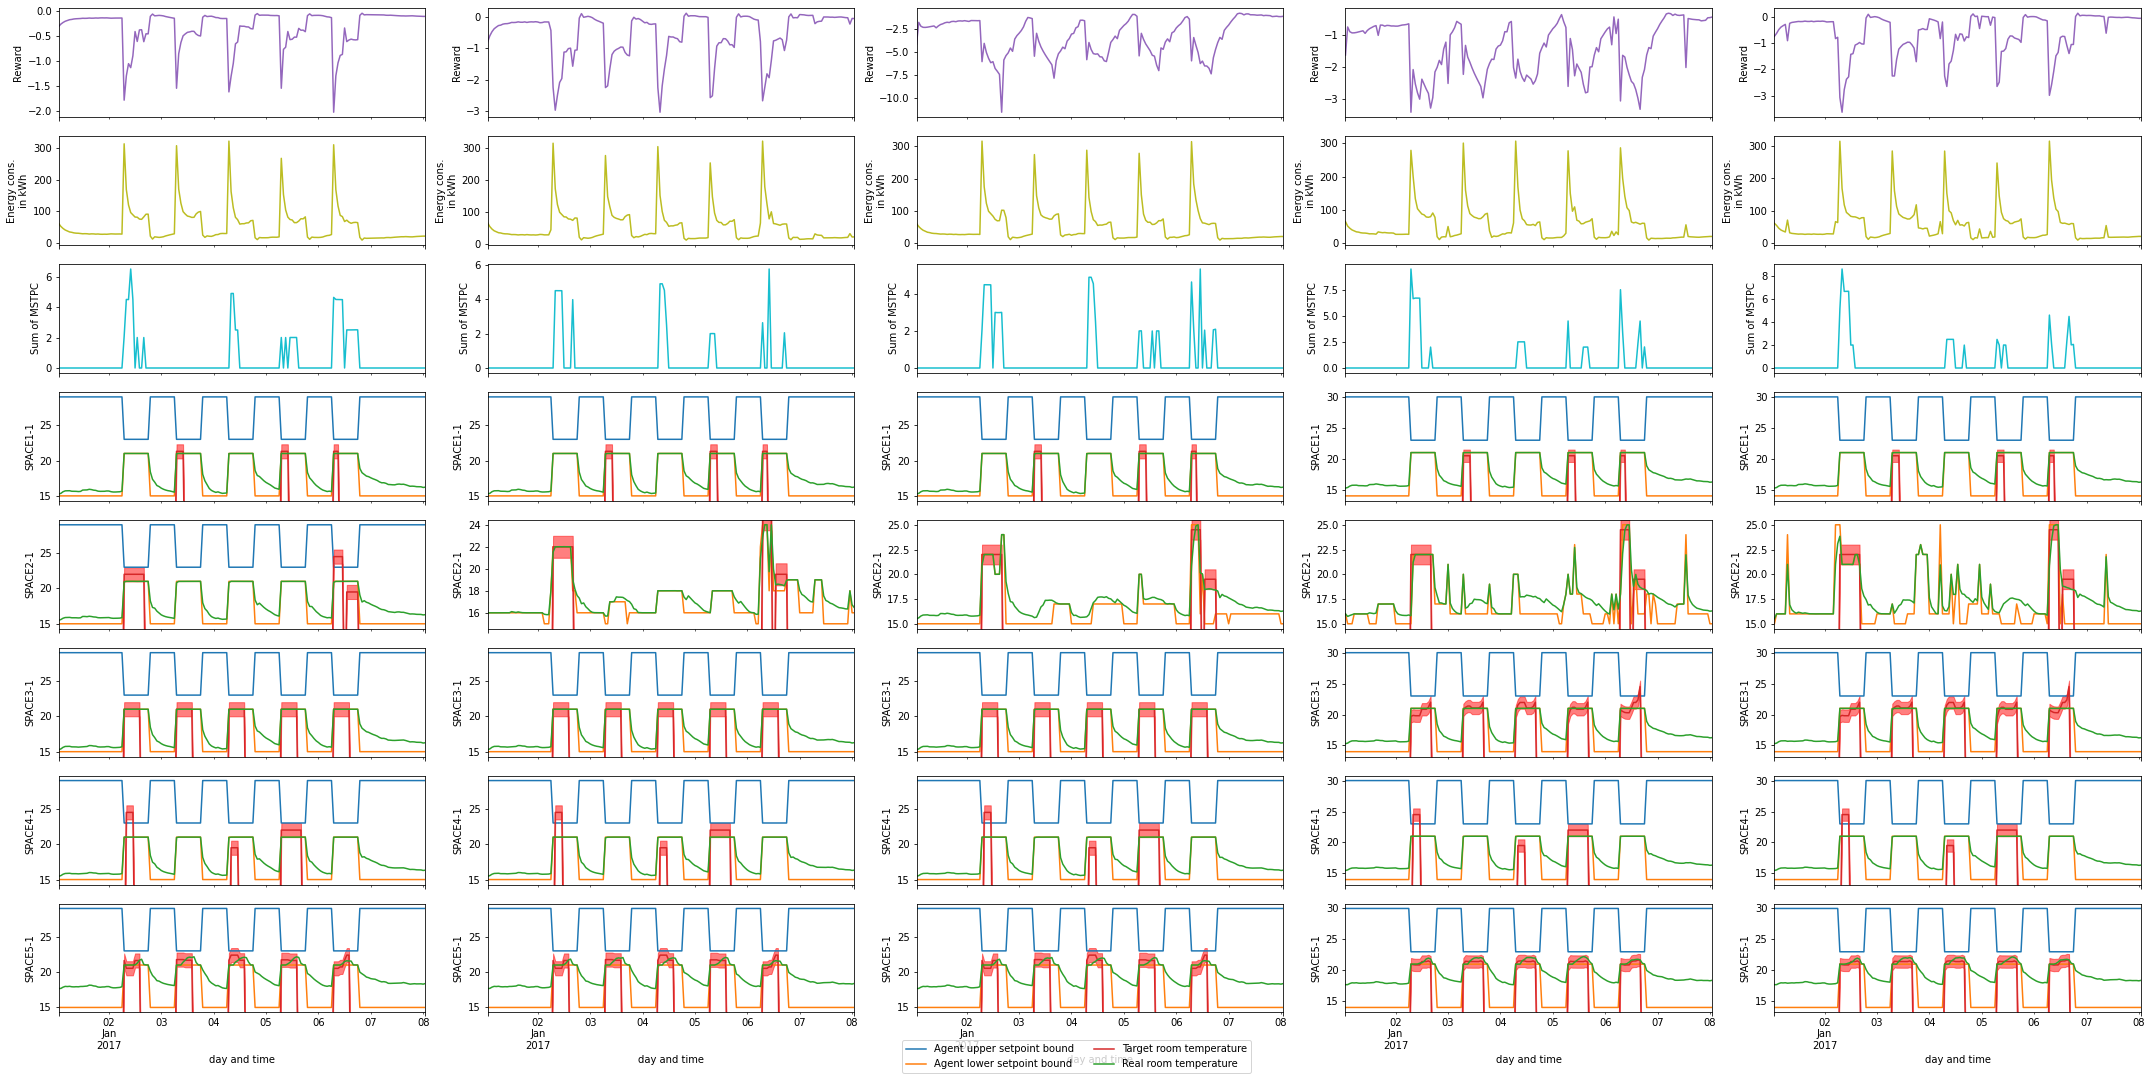

In [25]:
p, _ = vh.complete_plot_total_overview(subdfs, fig_width, subdfs_rooms, subdfs_agents)
p.show()

<h3>Details for a day</h3>

In [26]:
#selected_periods1    = [datetime.datetime(2017, 1, 3),
#                        datetime.datetime(2017, 1, 3),
#                        datetime.datetime(2017, 1, 3)]
#selected_periods1_end= [datetime.datetime(2017, 1, 4),
#                        datetime.datetime(2017, 1, 4),
#                        datetime.datetime(2017, 1, 4)]

In [27]:
if not "selected_periods1" in locals().keys():
    selected_periods1     = [datetime.datetime(2017, 1, 3) for _ in range(len(alldfs))]
if not "selected_periods1_end" in locals().keys():
    selected_periods1_end = [datetime.datetime(2017, 1, 4) for _ in range(len(alldfs))]

subdfs = vh.select_week_and_episode_with_end_for_dfs_list(
            alldfs,
            selected_episodes,
            selected_periods1,
            selected_periods1_end)

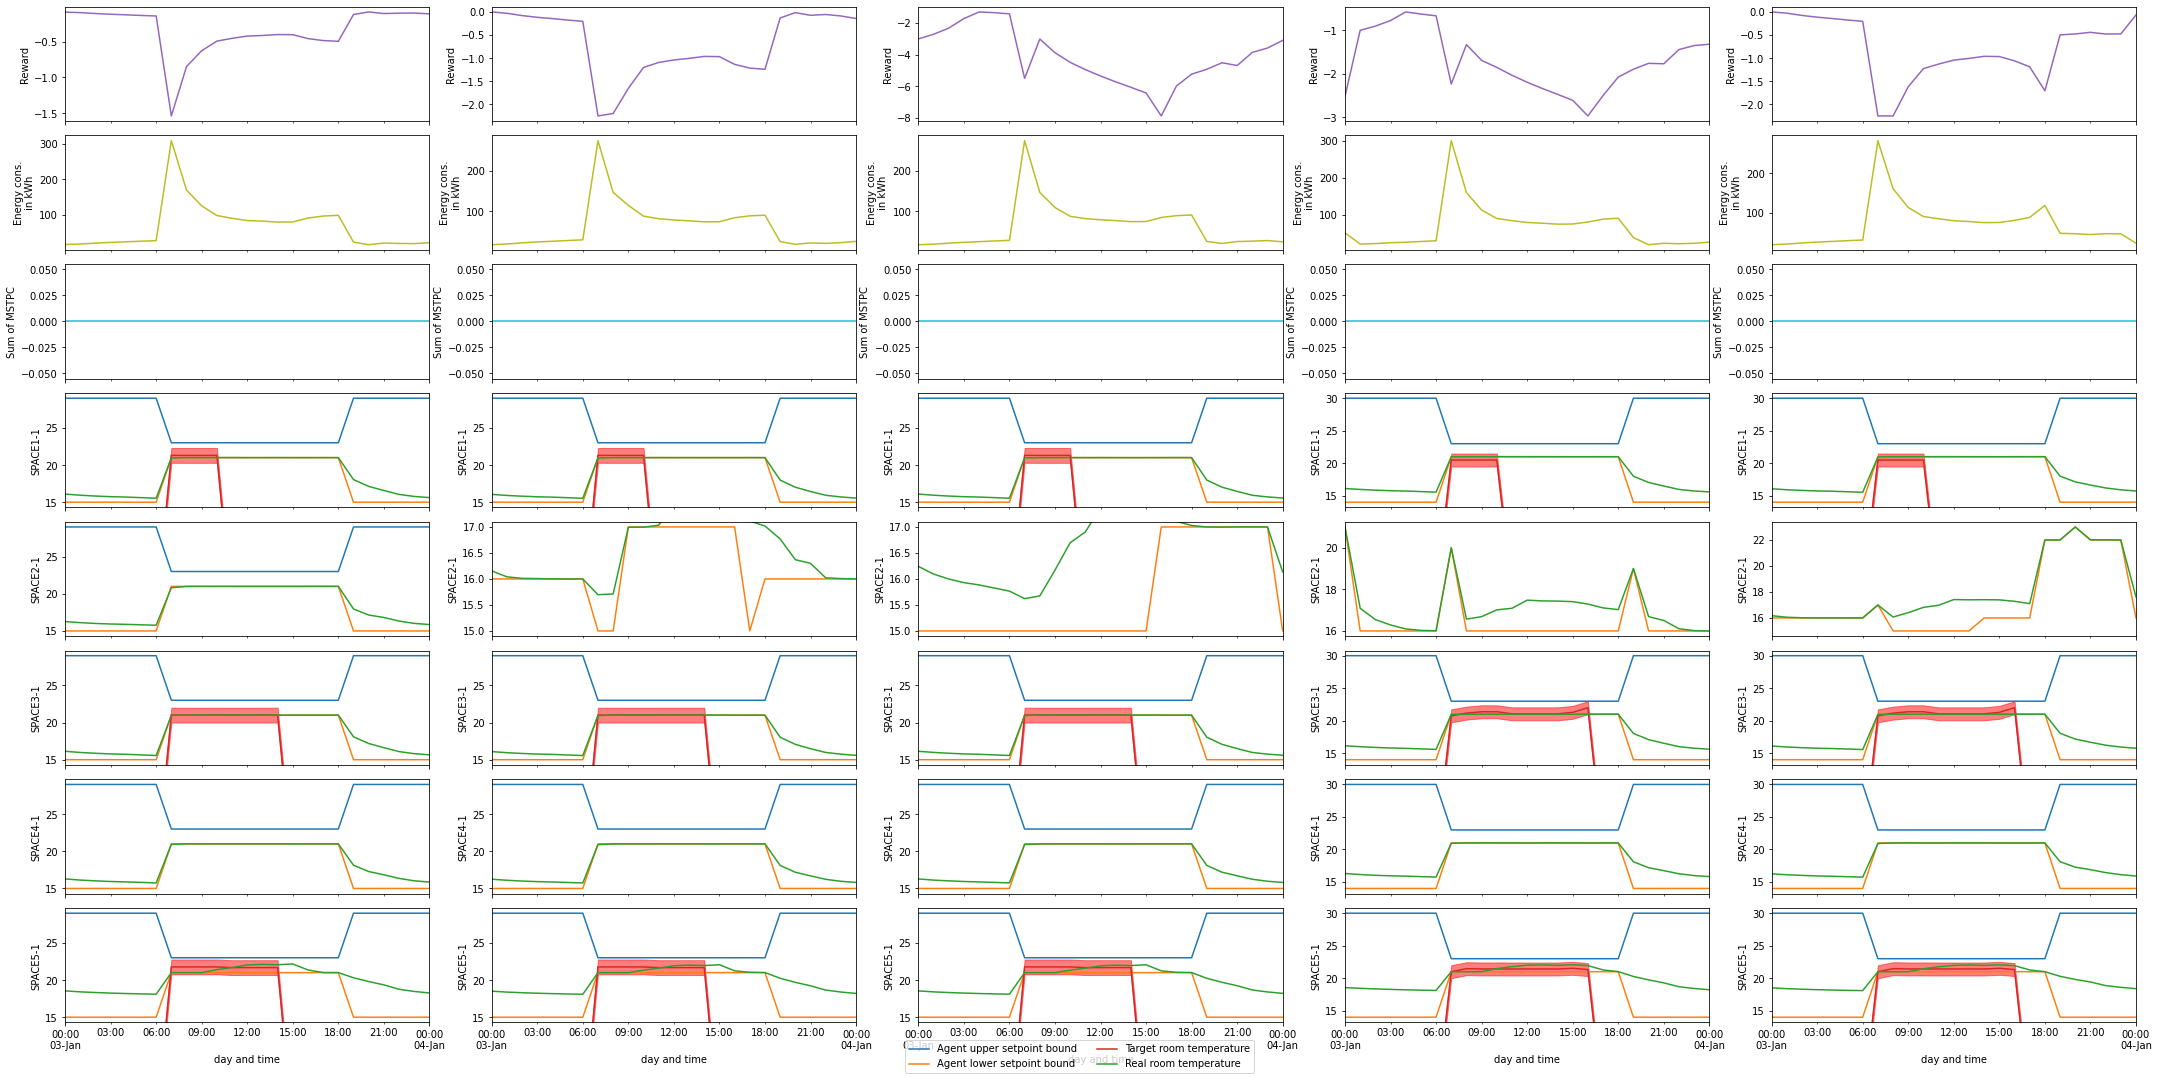

In [28]:
p, _ = vh.complete_plot_total_overview(subdfs, fig_width, subdfs_rooms, subdfs_agents)
p.show()

<h3>Details for a complete month</h3>

In [29]:
#selected_periods2    = [datetime.datetime(2017, 1, 1),
#                        datetime.datetime(2017, 1, 1),
#                        datetime.datetime(2017, 1, 1)]

In [30]:
if not "selected_periods2" in locals().keys():
    selected_periods2     = [datetime.datetime(2017, 1, 1) for _ in range(len(alldfs))]
selected_periods2_end = [datetime.datetime(2017, 1, 30) for _ in range(len(alldfs))]

subdfs = vh.select_week_and_episode_with_end_for_dfs_list(
            alldfs,
            selected_episodes,
            selected_periods2,
            selected_periods2_end)

For plot number 1, mean energy consumption =  52002.0 Wh, mean reward = -0.3174
For plot number 2, mean energy consumption =  51578.0 Wh, mean reward = -0.5597
For plot number 3, mean energy consumption =  50994.1 Wh, mean reward = -3.4074
For plot number 4, mean energy consumption =  52883.3 Wh, mean reward = -1.4548
For plot number 5, mean energy consumption =  52533.6 Wh, mean reward = -0.5910


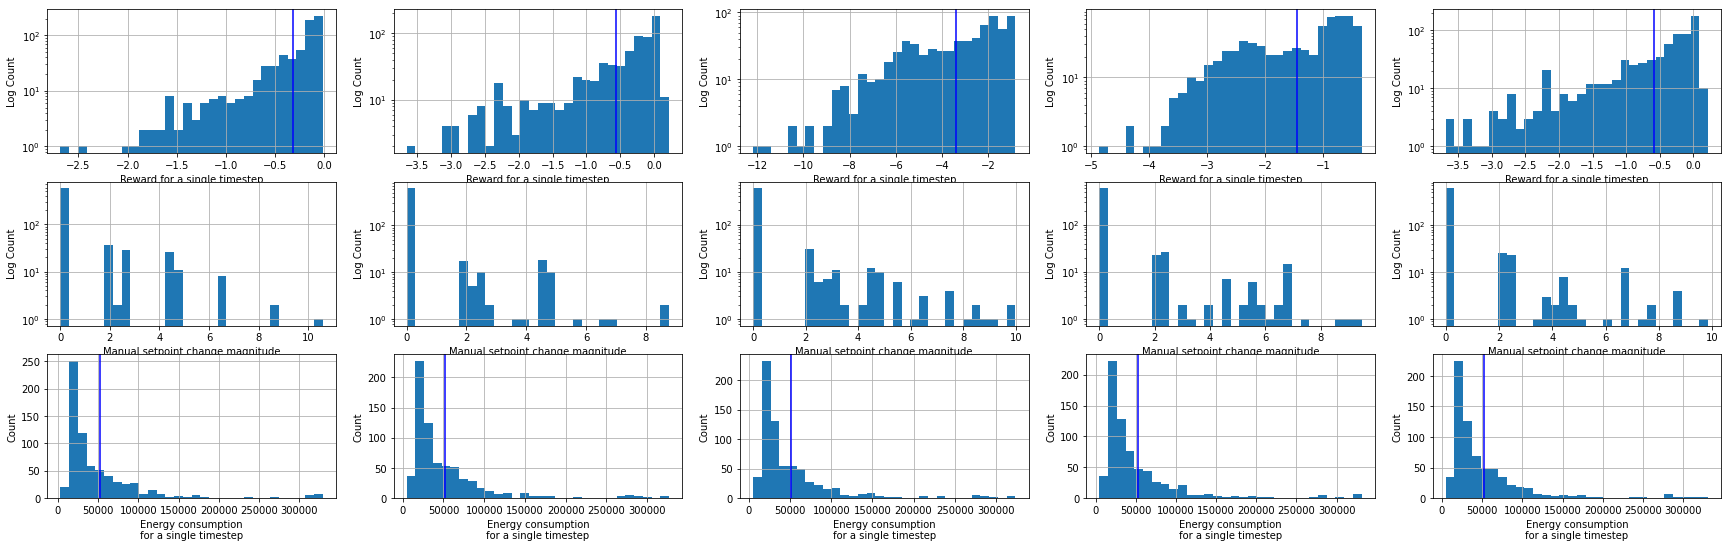

In [31]:
vh.plot_stpch_and_econs_distrib(subdfs, fig_width)

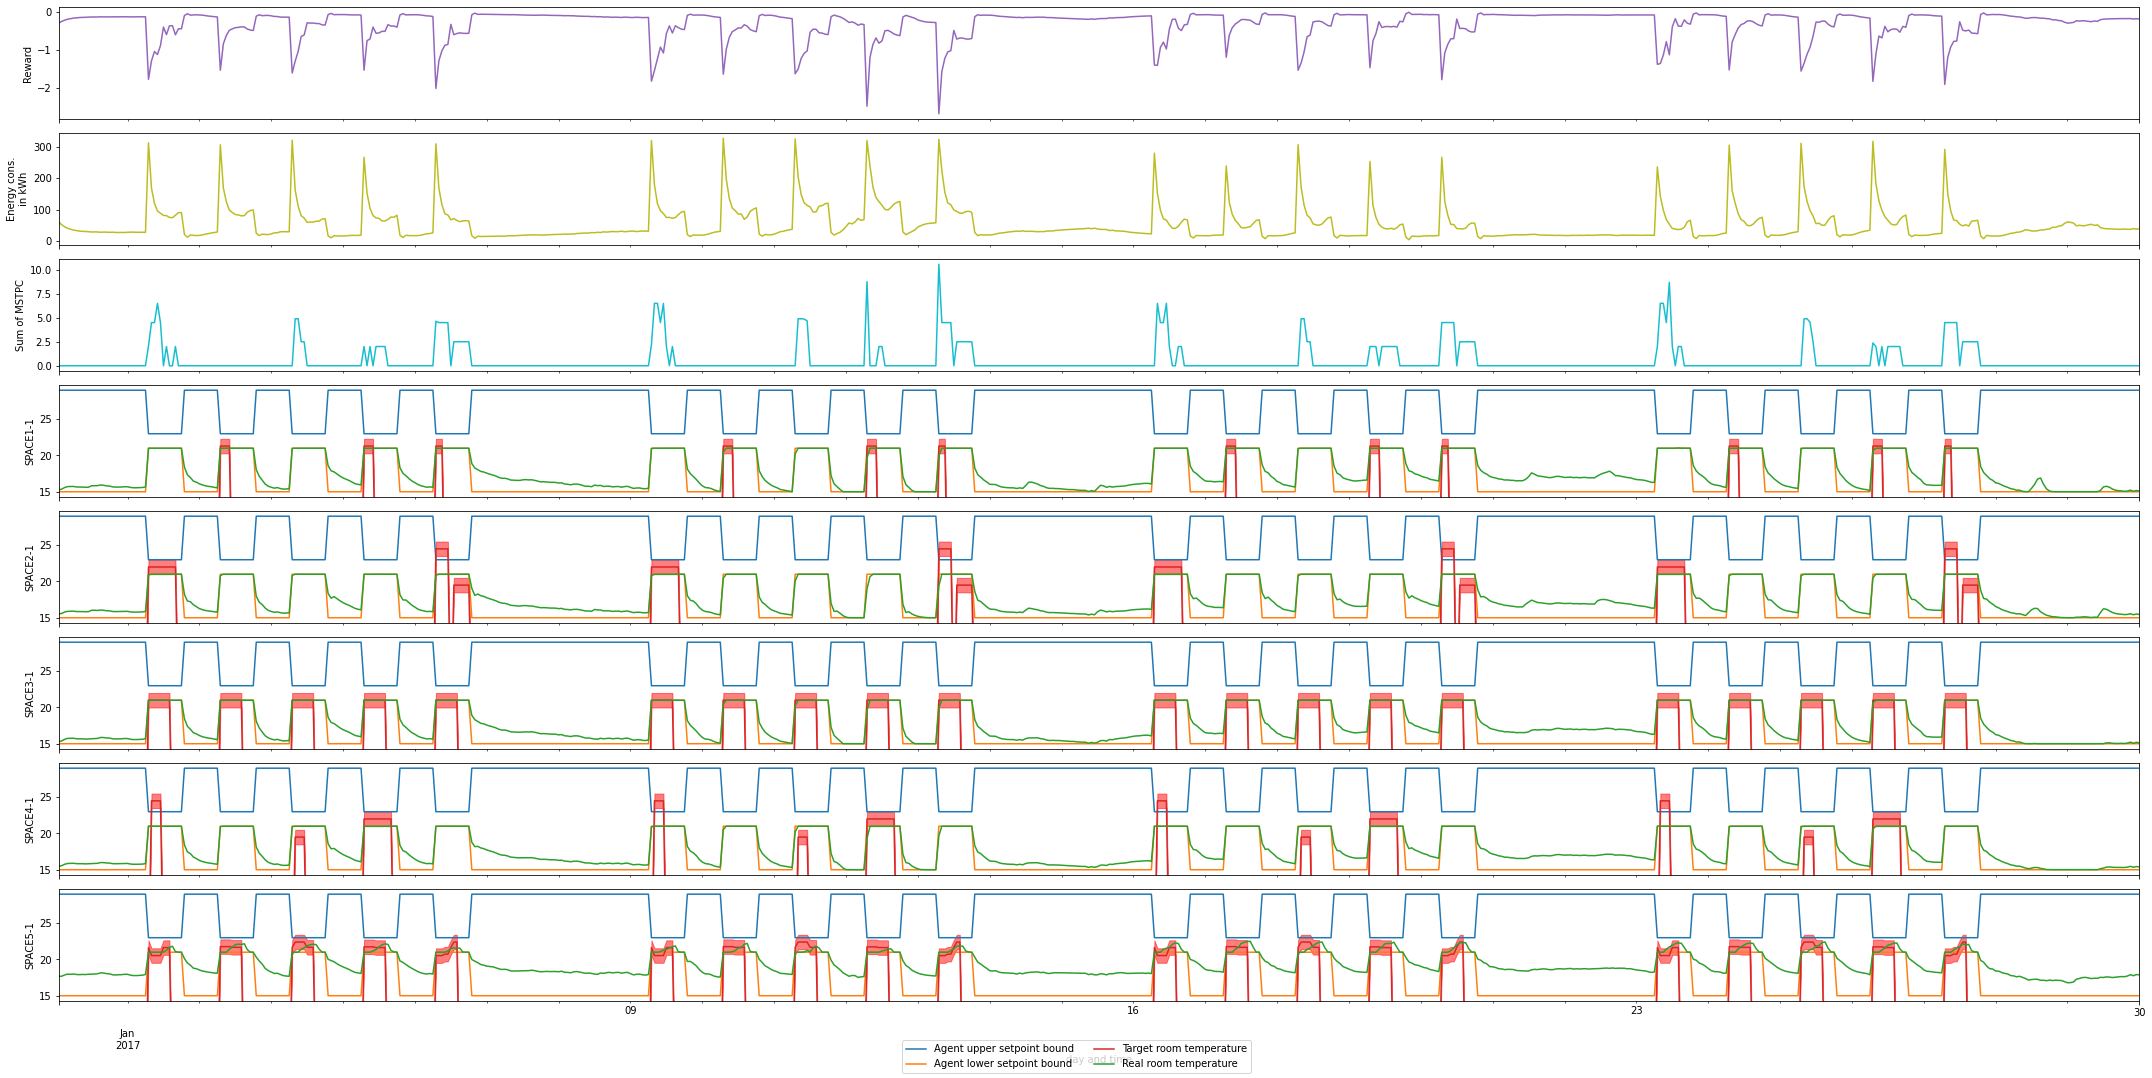

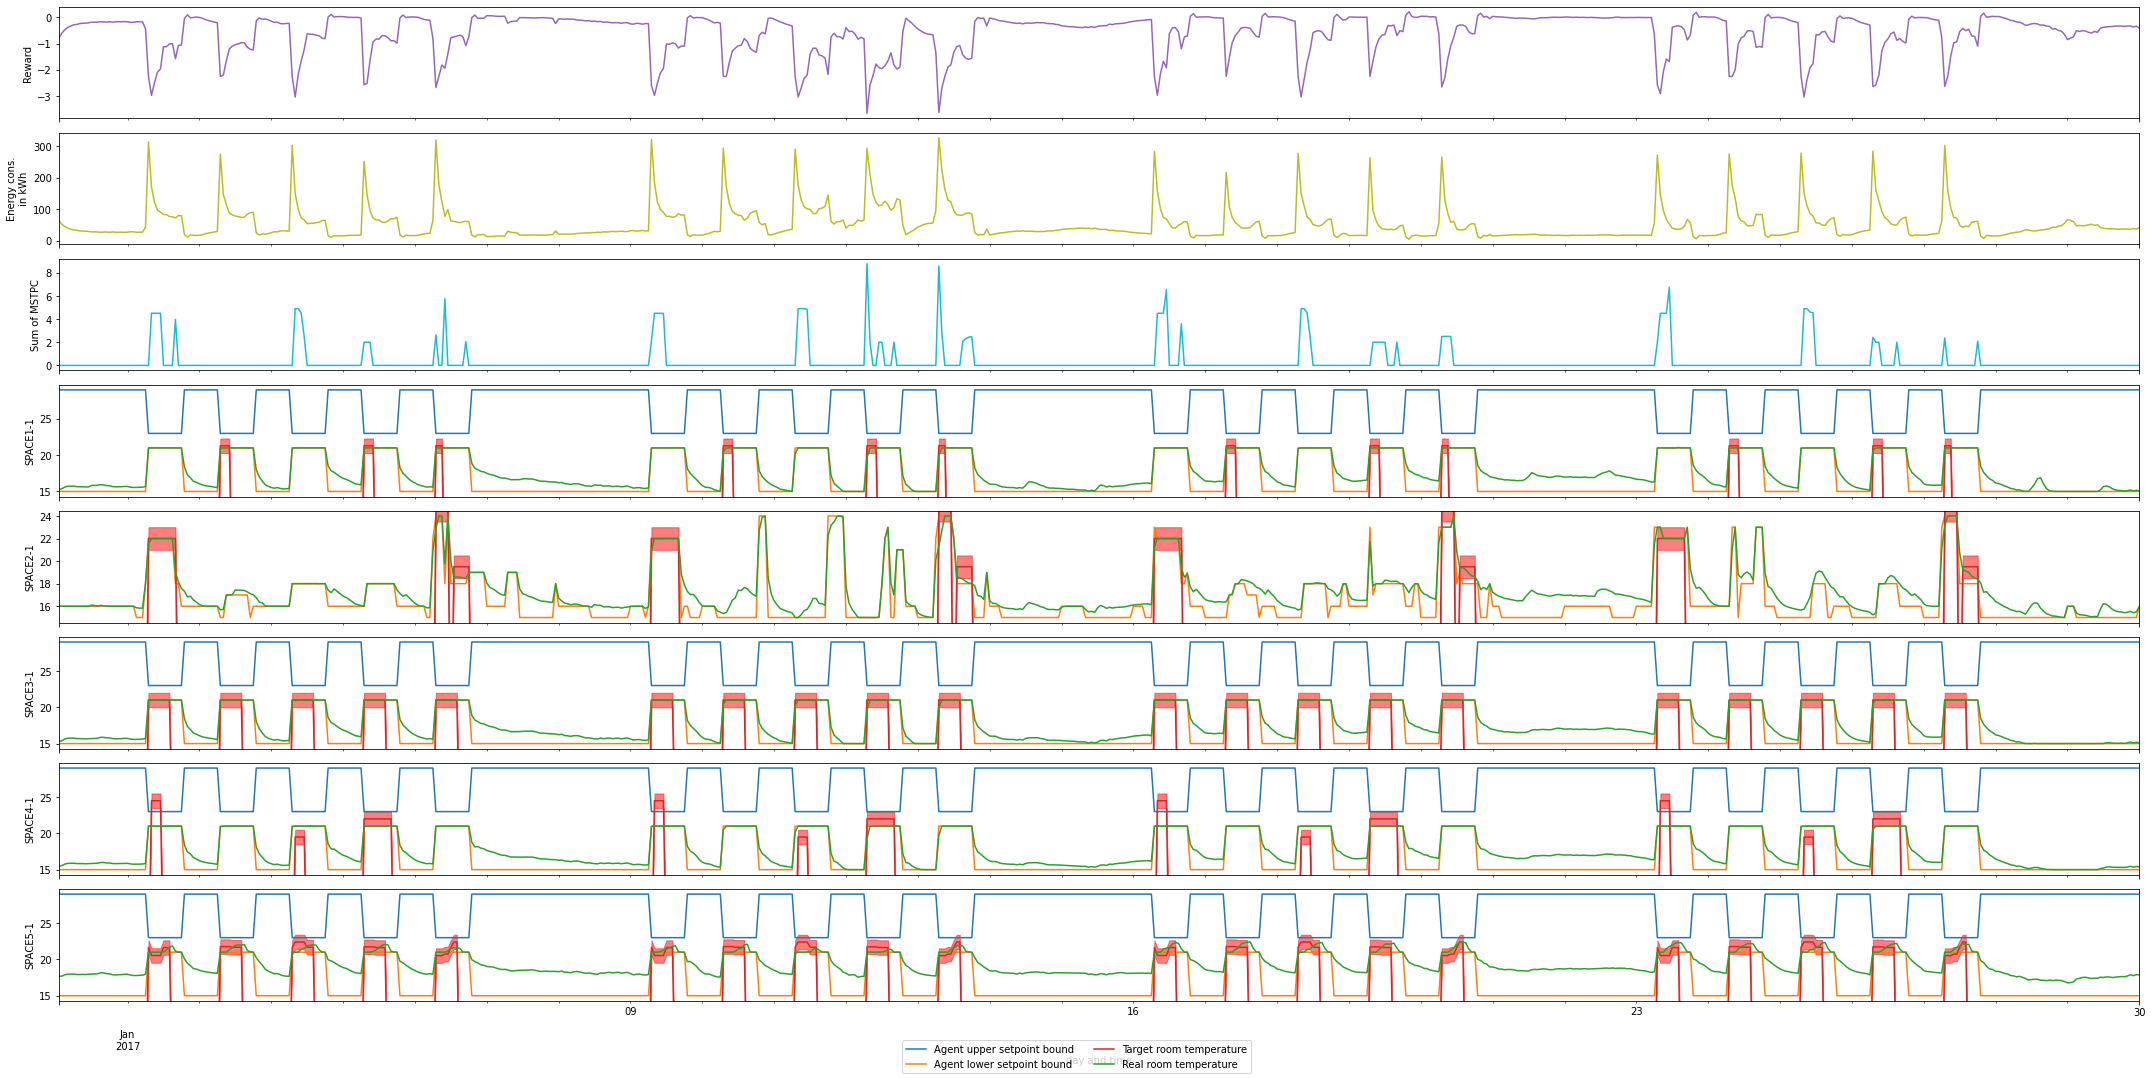

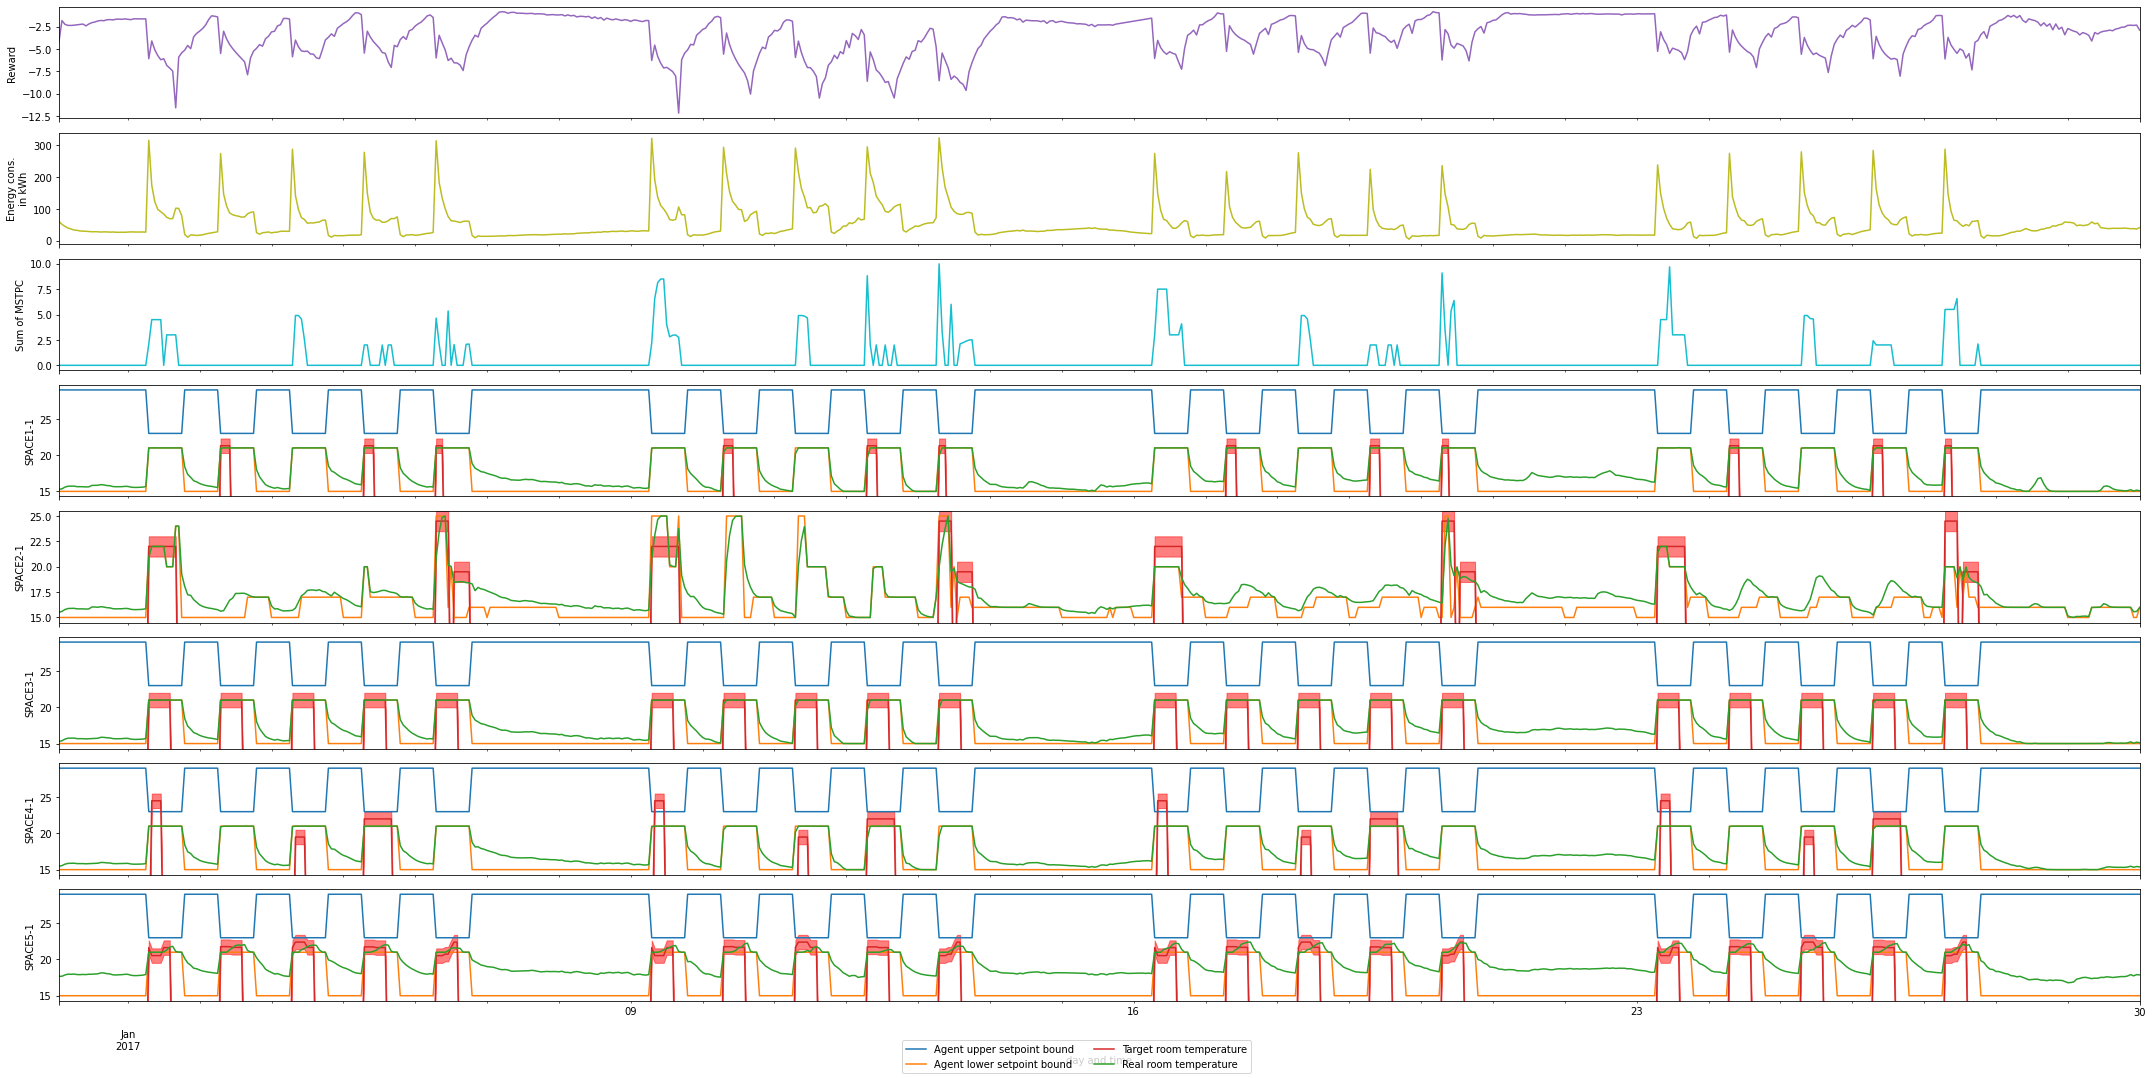

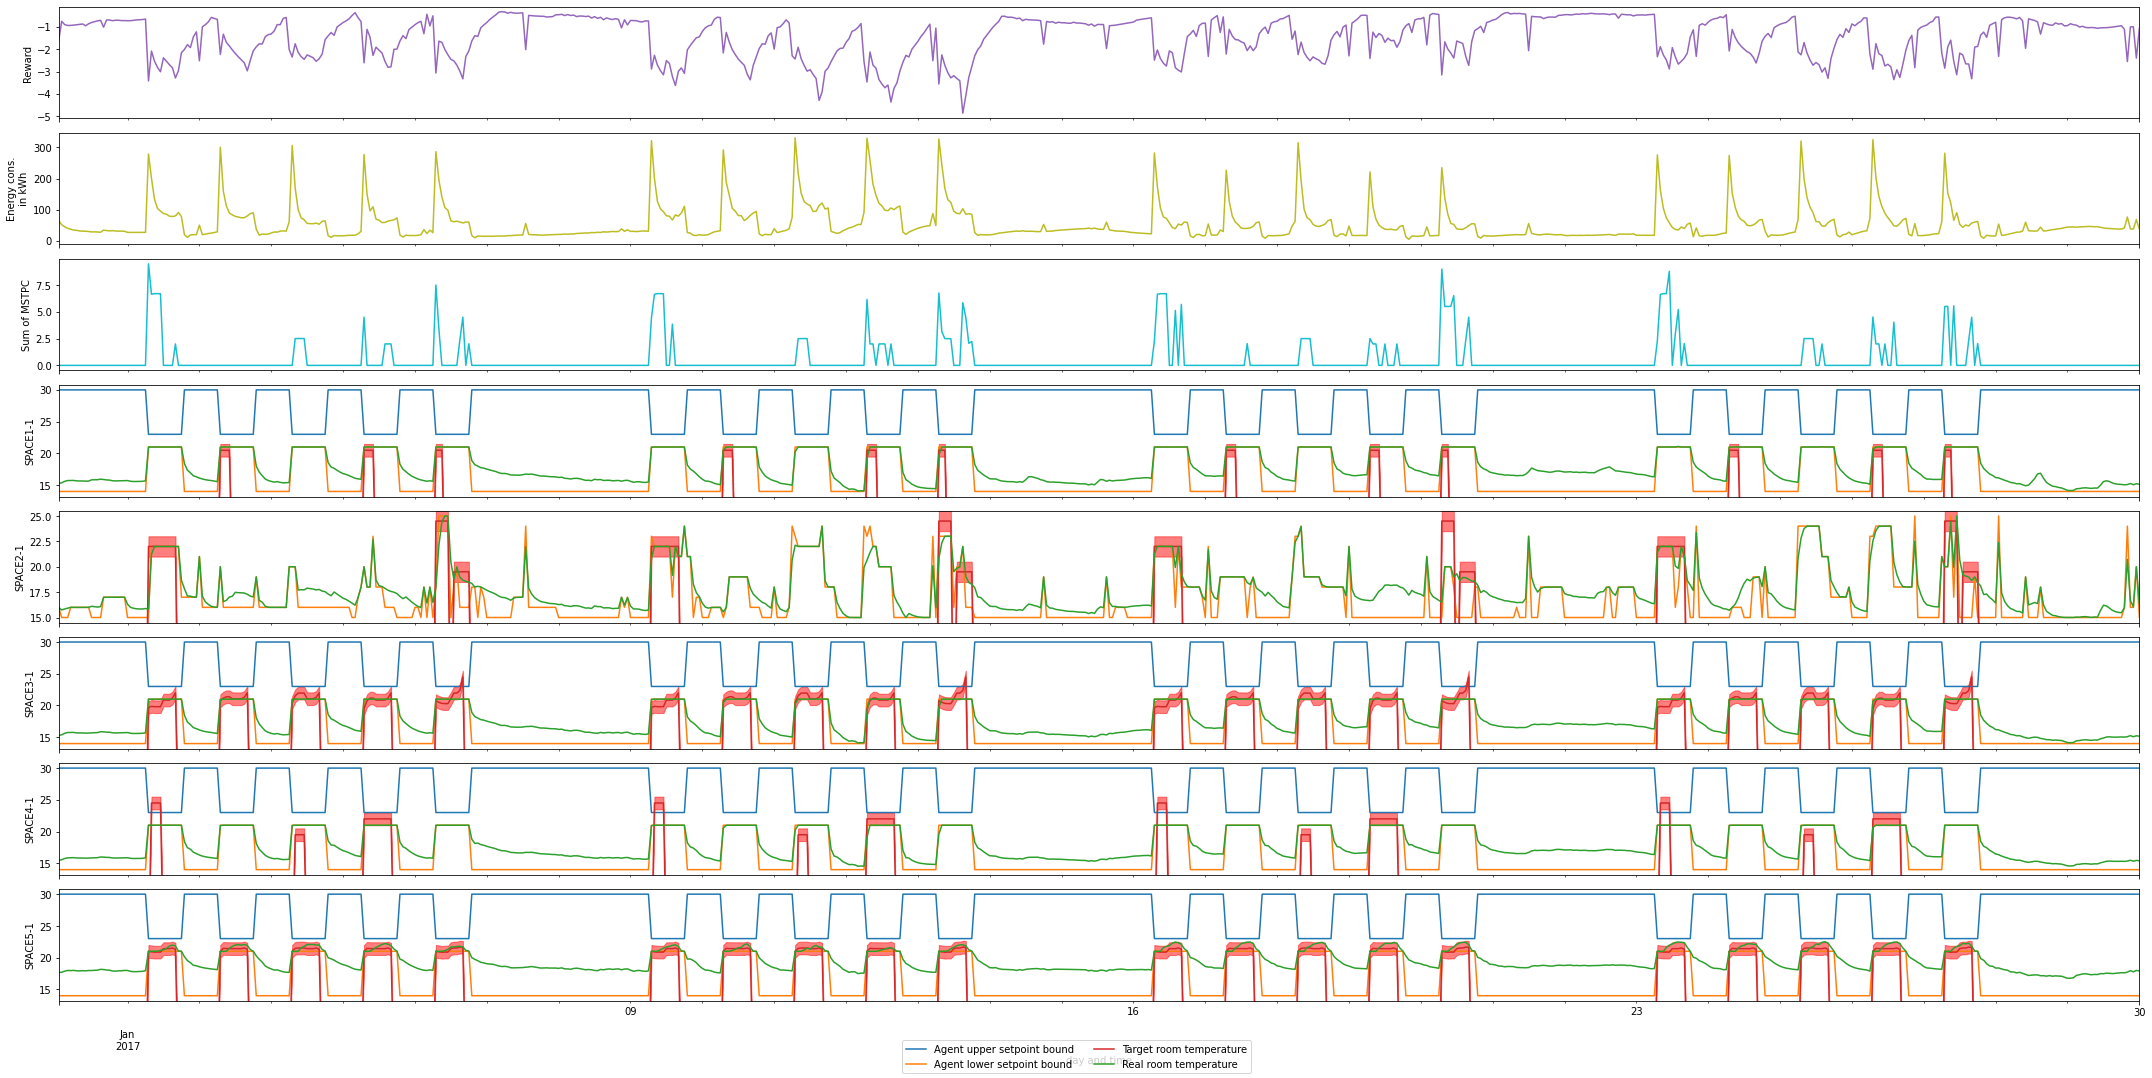

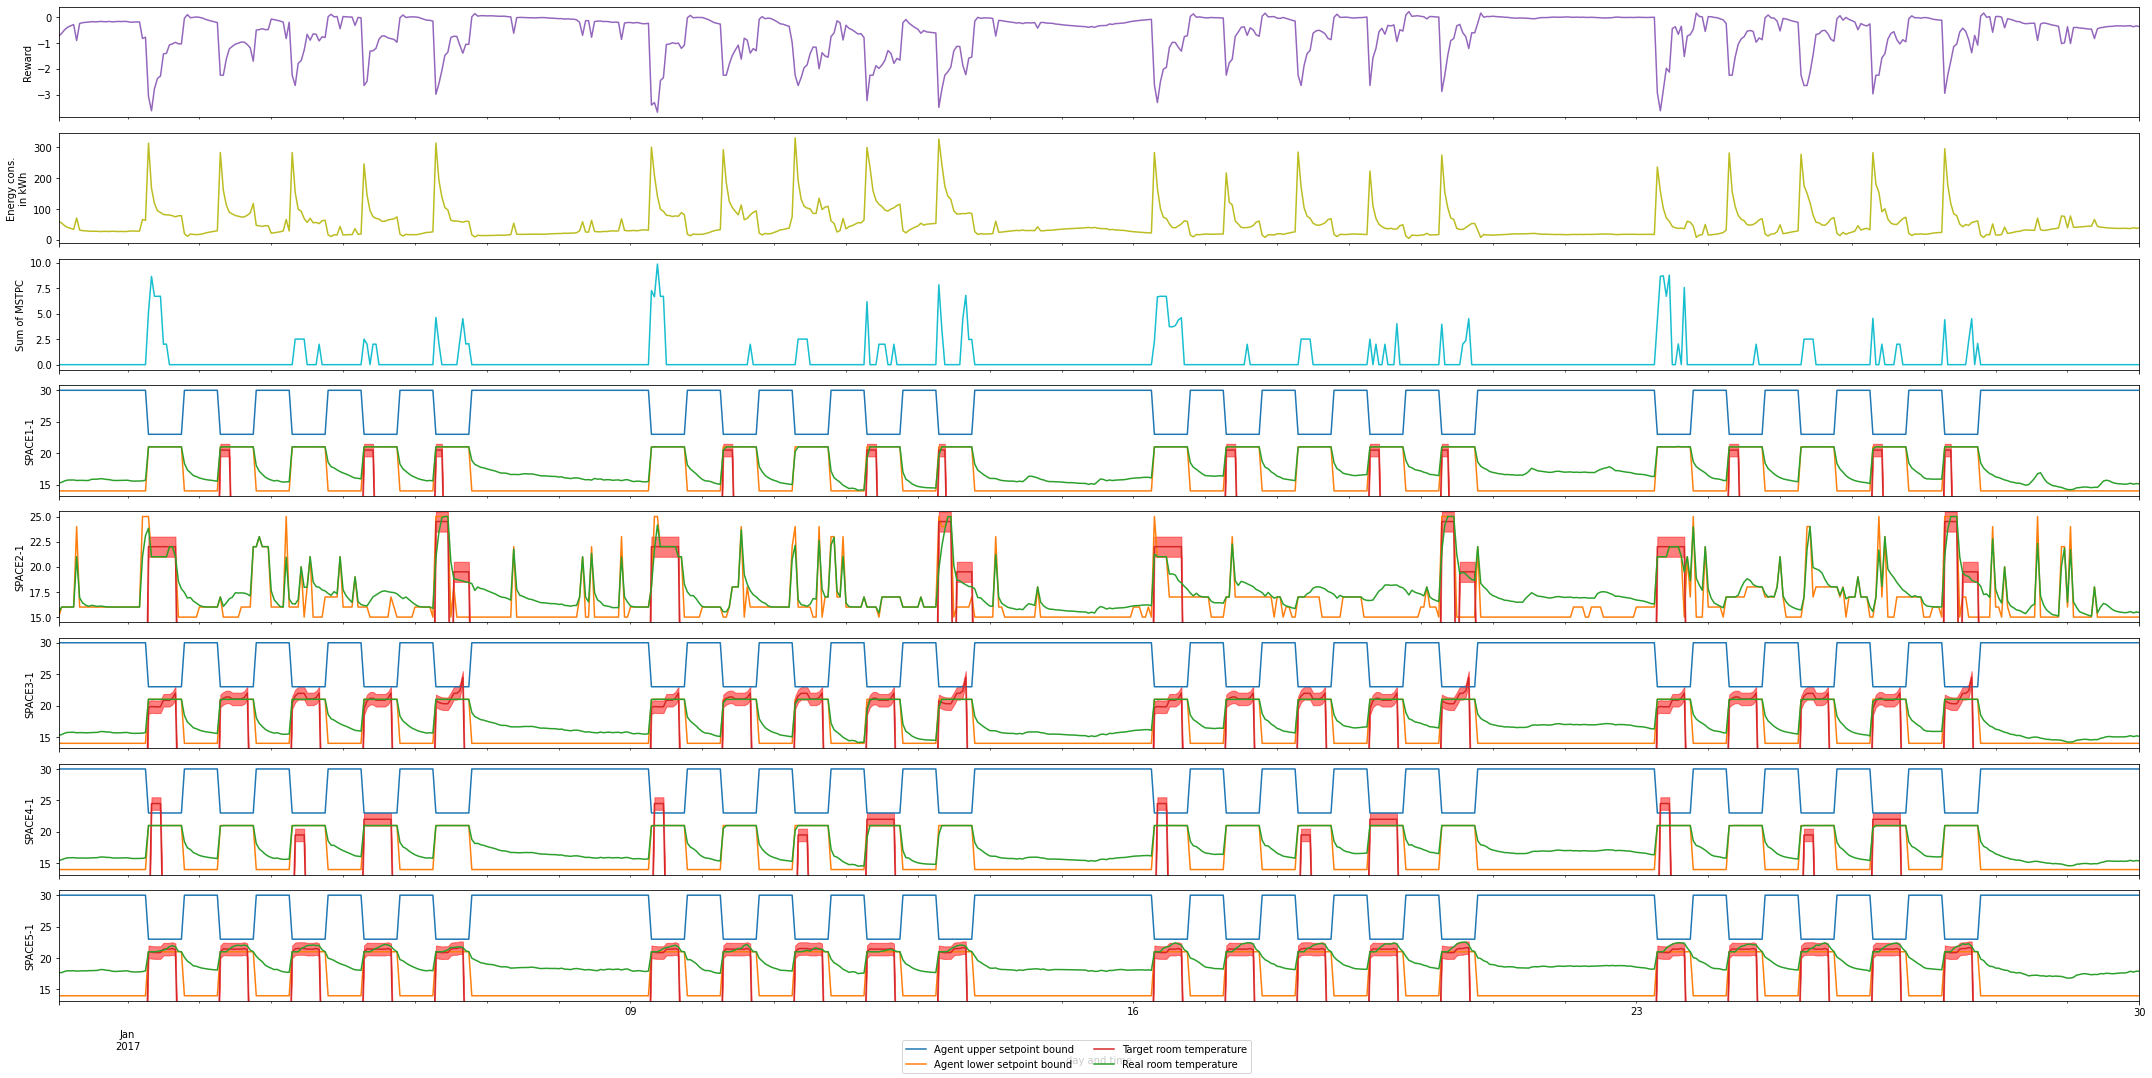

In [32]:
for idx, sdfs in enumerate(subdfs):
    p, _ = vh.complete_plot_total_overview(sdfs, fig_width,
                                           subdfs_rooms[idx],
                                           subdfs_agents[idx])
    p.show()

No q-values available for scenario 1: s302-ln, agent 1
No q-values available for scenario 1: s302-ln, agent 2
No q-values available for scenario 1: s302-ln, agent 3
No q-values available for scenario 1: s302-ln, agent 4
No q-values available for scenario 2: s303, agent 1
No q-values available for scenario 2: s303, agent 2
No q-values available for scenario 2: s303, agent 3
No q-values available for scenario 2: s303, agent 4
No q-values available for scenario 3: s303-npar, agent 1
No q-values available for scenario 3: s303-npar, agent 2
No q-values available for scenario 3: s303-npar, agent 3
No q-values available for scenario 3: s303-npar, agent 4
No q-values available for scenario 4: s304, agent 1
No q-values available for scenario 4: s304, agent 2
No q-values available for scenario 4: s304, agent 3
No q-values available for scenario 4: s304, agent 4


(<Figure size 2160x864 with 8 Axes>,
 array([<AxesSubplot:ylabel='Scenario 1: s302-ln\nAgent 0'>,
        <AxesSubplot:ylabel='Scenario 2: s303\nAgent 0'>,
        <AxesSubplot:ylabel='Scenario 3: s303-npar\nAgent 0'>,
        <AxesSubplot:ylabel='Scenario 4: s304\nAgent 0'>], dtype=object))

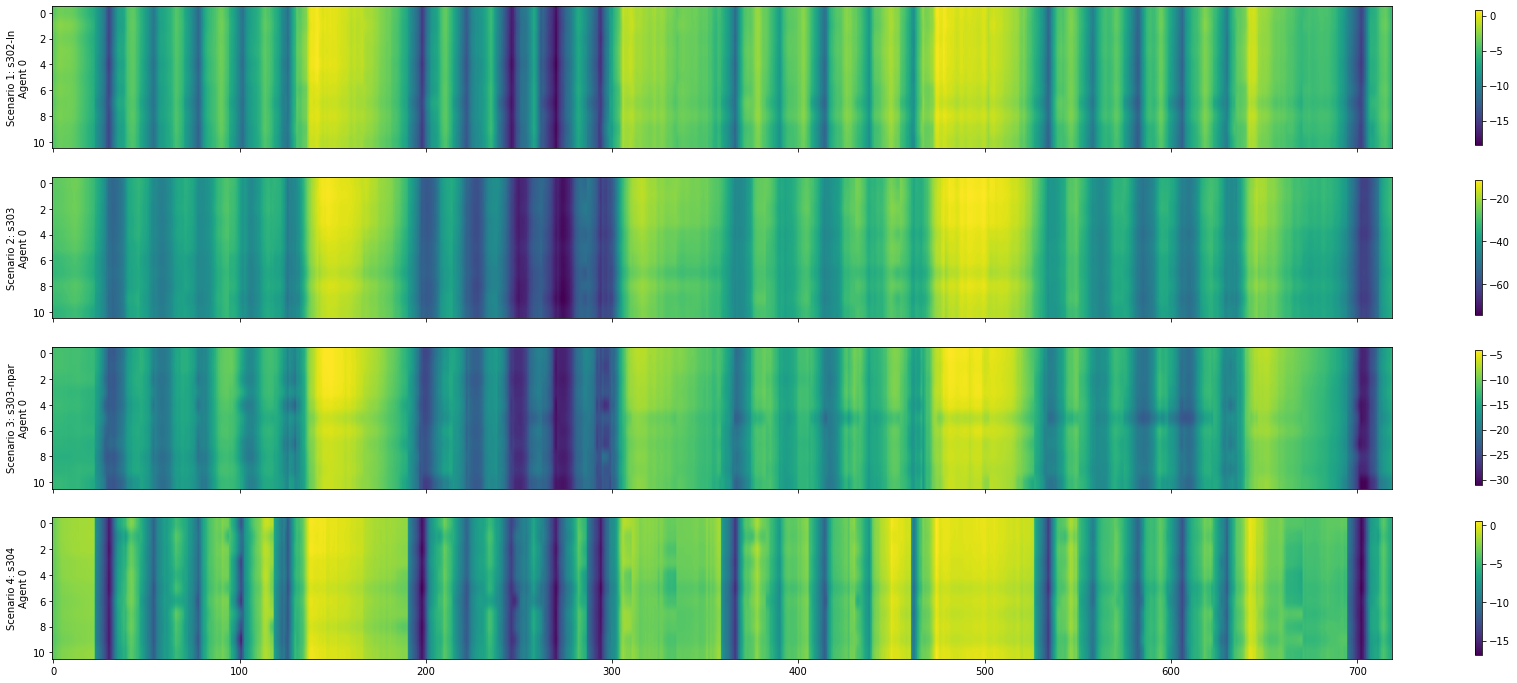

In [33]:
vh.plot_q_values(q_values, fig_width)